# Anas Mohsen 18634 - Intro to CV - Assignment 1
# Face detection at different angles

This assignment explores the challenges of the correspondence problem when applying a template to an image other than the one the template was taken from. Not only do we have variation in the images but also we will be taking different templates with variations. The variations here include but are not limited to changing facial expressions, rotation and difference in lighting. 

For this assignment, the images that I have taken are from the Lahore Qalandar's trophy celebration upon winning the Pakistan Super League 7. We chose Shaheen Shah Afridi as our subject.

In [1]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt

## Loading images

In [25]:
cwd = os.getcwd()
images_path = cwd + "\\pics"
image_file_names = os.listdir(images_path)
images = []

for image_file in image_file_names:
    img = cv.imread(images_path+"\\"+image_file)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    images.append(img)

In [26]:
def show_image(image, cmap=None):
    plt.figure()
    if cmap:
        plt.imshow(image, cmap)
    else:
        plt.imshow(image)

We took screen captures of Shaheen celebrating with his team mates. Note the variations in each image.

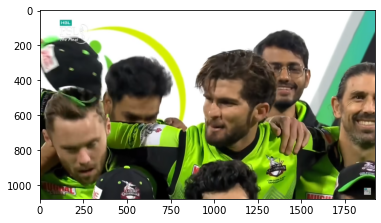

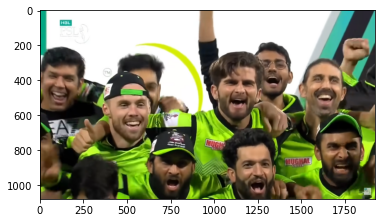

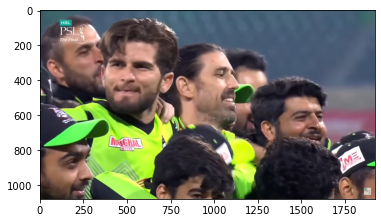

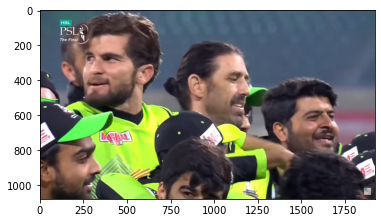

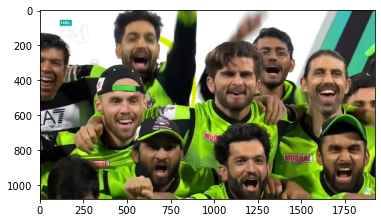

In [27]:
for image in images:
    show_image(image)

## Faces Cropped From Images

As you can see here, these are the templates that we will be looking to match. Note the differences.

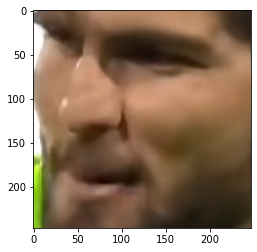

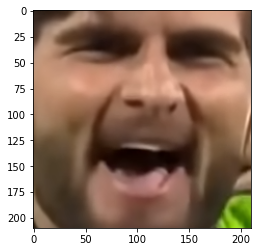

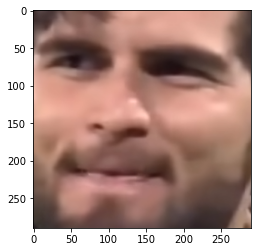

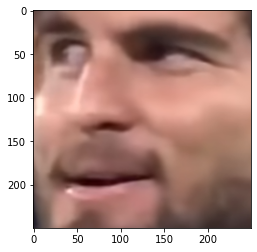

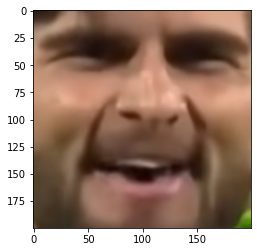

In [40]:
face_1 = images[0][478:725,936:1183]
face_2 = images[1][381:591,1031:1241]
face_3 = images[2][245:535,390:680]
face_4 = images[3][230:480, 250:500]
face_5 = images[4][330:530, 1025:1225]

faces = [face_1, face_2, face_3, face_4, face_5]

for face in faces:
    show_image(face)

## Applying the face templates/filters to the image

We use the mean approach for template matching.

In [41]:
def detectFaceMean(image, face):
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    image_gray = image_gray/255.
    face_gray = cv.cvtColor(face, cv.COLOR_RGB2GRAY)
    face_gray = face_gray/255.
    mean_image_gray = cv.subtract(image_gray, cv.mean(image_gray))
    mean_face = cv.subtract(face_gray, cv.mean(face_gray))
    result = cv.filter2D(mean_image_gray, -1, mean_face)
    return result

In class we saw how the maximum values resulting due to the application of filter were shown in grayscale and jet separately. Here we will be overlaying the map of values produced when applied the filter over the images to show clearly the areas bieng maximized by the filter. 

In [72]:
def findFaceInImages(face, images, face_number):
    show_image(face)
    for i in range(len(images)):
        if not i == face_number:
            result = detectFaceMean(images[i], face)
            max_result = image.reshape((images[i].shape[0]*image.shape[1], 3)).max(axis=0)
            plt.figure(figsize = (10,20))
            plt.imshow(images[i], 'gray', interpolation='none')
            plt.imshow(result, 'jet', interpolation='none', alpha=0.6)
            plt.show()

## Locating the templates in the images

We match each of the templates in all of the images other than the one from which the template was taken from.

### Locating face 1 in the images

In template which we name 'face 1'. Shaheen looks sideways to his right. The angle of his sideways rotation is definitely less than 90 degrees. By eyeballing the template, it looks like that the angle of his rotation is around 45 degrees.

In the first photo bieng matched where Shaheen is looking straight with a visibly happy expression, the matching is poor using this template. In our template Shaheen looks sideways while in the photo he looks straight and there is difference in expression as well. Both of these things seem to contribute to a poor match.

The above is the case again in the last photo, the template shown below does not match well at all in the images where Shaheen looks straight.

In the rest of the photos however, the reigon containing Shaheen's face apparently does have maximal values. In these photos the orientation is similar to the one in the template but they are different images than the one from which the template was cropped out from. 

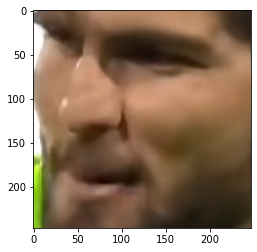

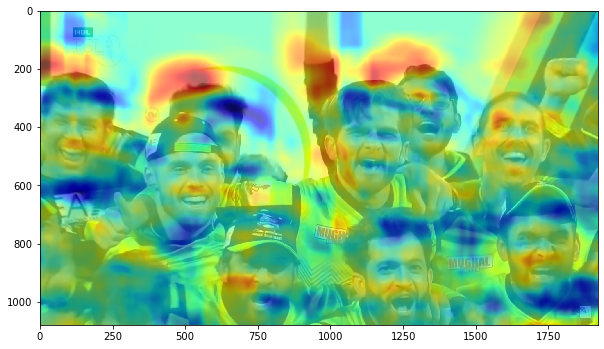

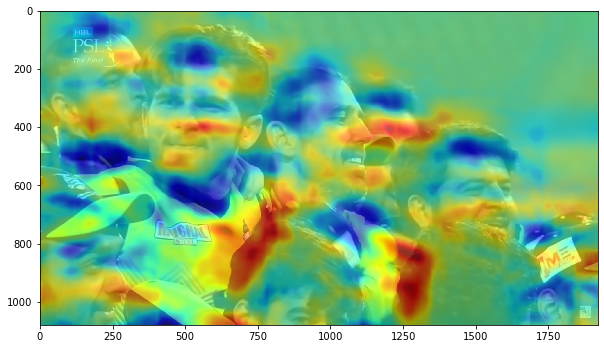

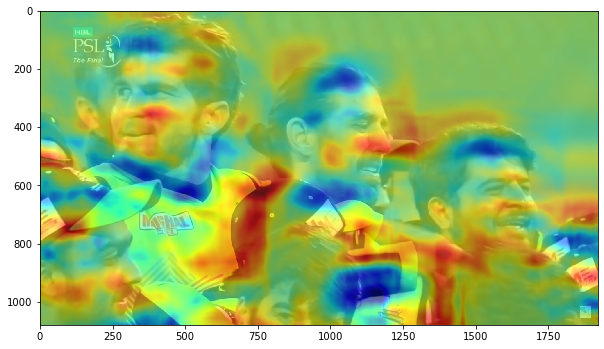

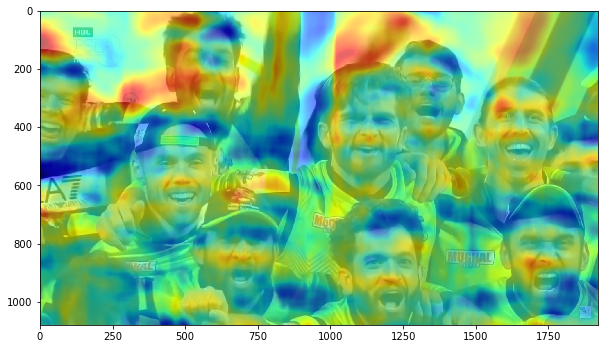

In [73]:
findFaceInImages(faces[0], images, 0)

### Locating face 2 in the images

The template below produces a good match in the last photo where the facial expressions are a little different than in the template, Shaheen's mouth is less open but the orientation is identical as the orientation in the template. There is a maximal value right in the centre of Shaheen's face in the last photo.

In the second from the top photo, there are maximal values in the riegon containing Shaheen's face but there are also maximal values scattered throughout the photo. Same is the case for the second to last photograph. Once again difference in orientation.

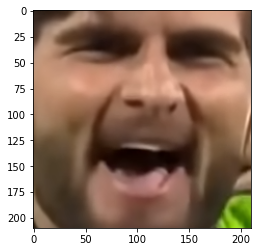

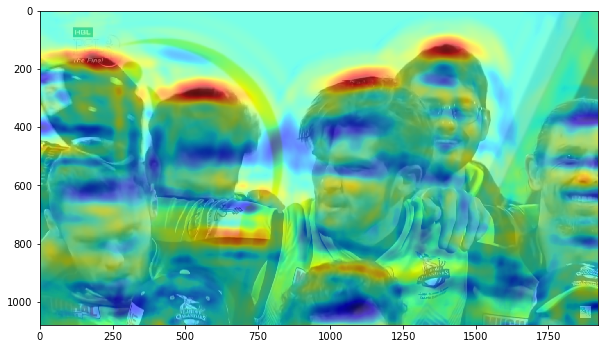

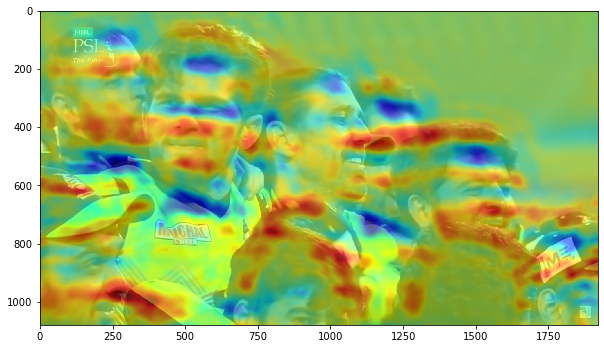

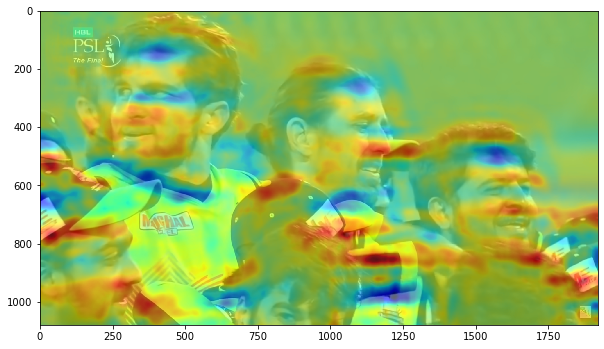

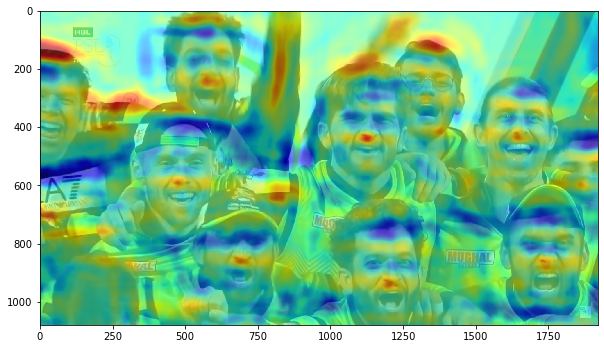

In [74]:
findFaceInImages(faces[1], images, 1)

### Locating face 3 in the images

In the first and the second to last photos, the angle of rotation horizontally towards the right looks around 10 degrees to 15 degrees. Still despite the difference in angle, there is a maximal value in the center of the reigon where Shaheen's face is.

Bad match in the photos where Shaheen looks straighter, the difference in angle in these photos from the template looks anywhere between 30 degrees to 45 degrees.

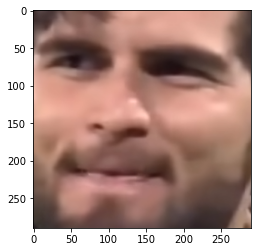

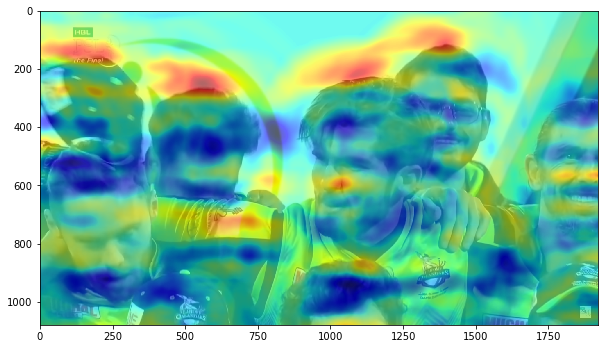

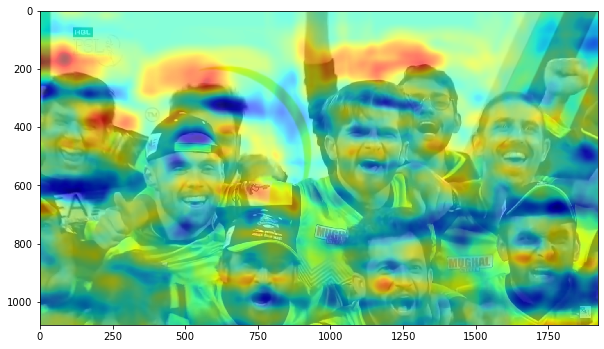

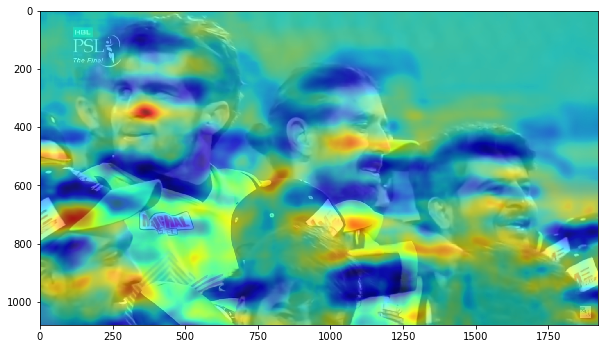

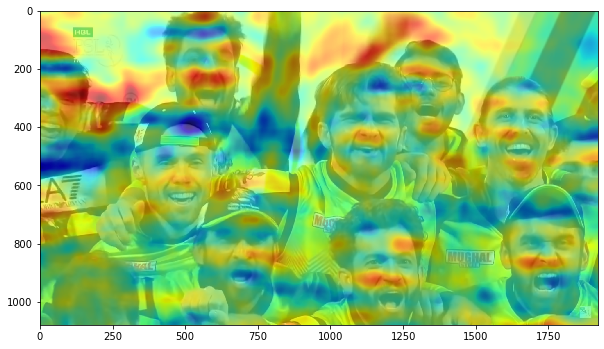

In [75]:
findFaceInImages(faces[2], images, 2)

### Locating face 4 in the images

In the template below, not only is there a slight difference in angle but there is also a difference in facial expression. Shaheen's right eyebrow is raised and his right eye is wider. Yet still in the first photo a maximal value is observed at the center of Shaheen's face. Same can be said for the second to last photo. 

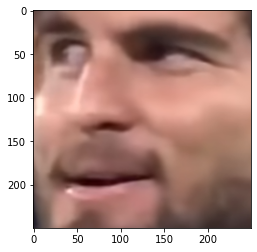

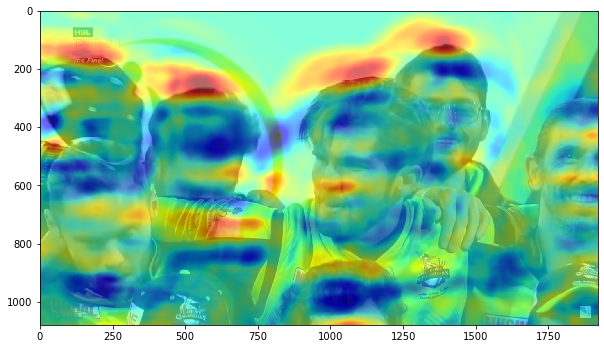

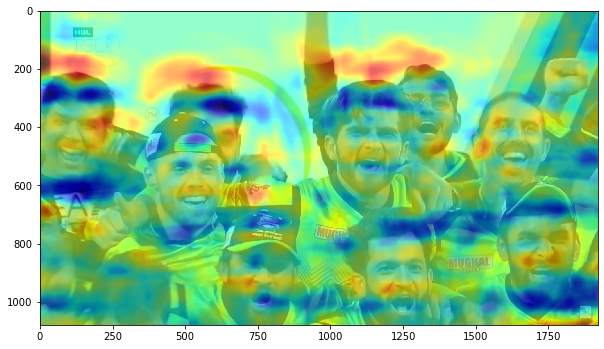

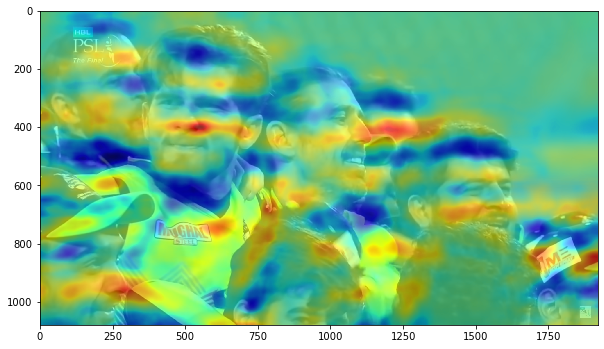

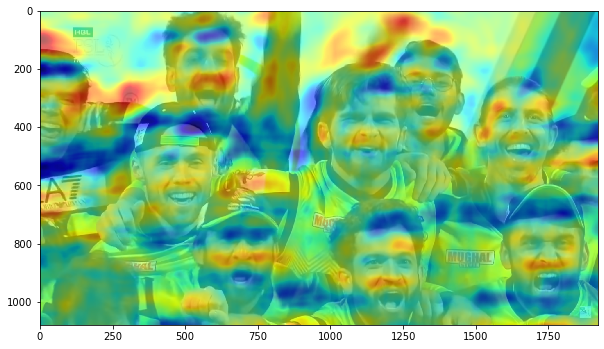

In [76]:
findFaceInImages(faces[3], images, 3)

### Locating face 5 in images

In the second photo there is difference in facial expression but orientation is identical. There is a maximal value at the center of Shaheen's face.

In all of the sideways facing photos the match is not very prominent.

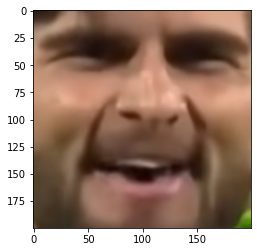

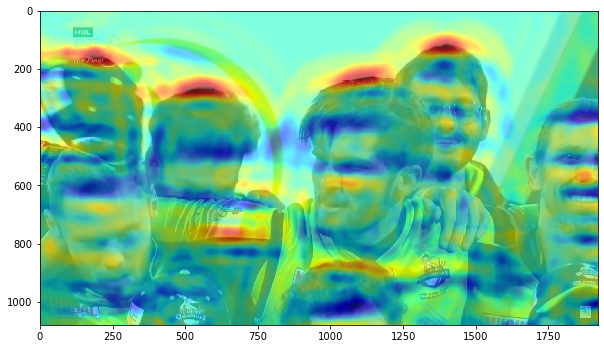

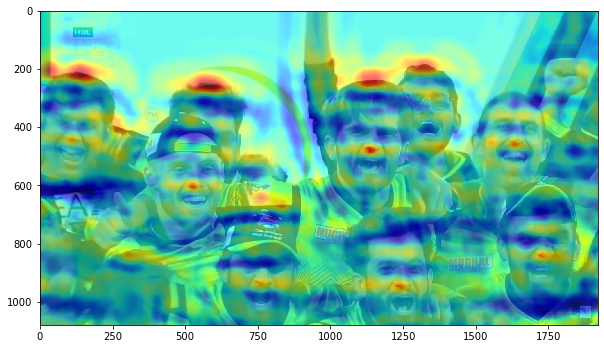

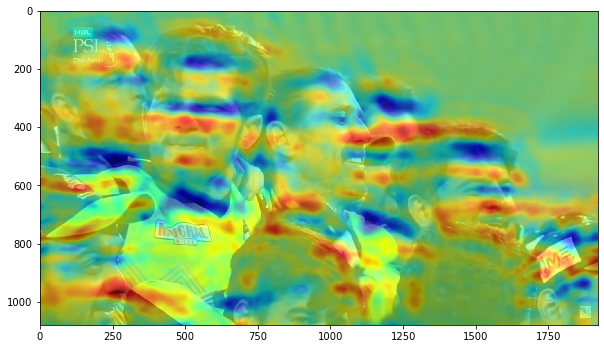

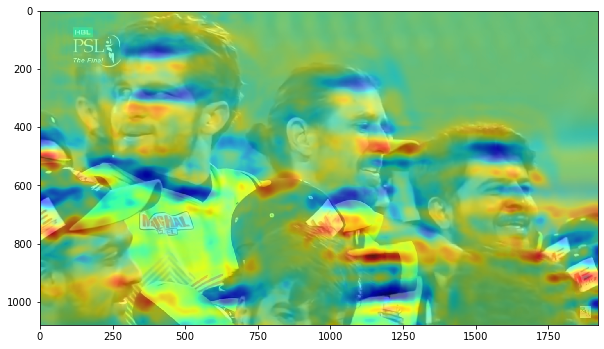

In [77]:
findFaceInImages(faces[4], images, 4)

## Findings

In sideways rotation i.e facing towards the left or right, by looking at the examples above I feel that the template was matching well upto the point where the angle of rotation is somewhere between 10 degrees to 15 degrees. When the rotation was between 30 degrees to 45 degrees, the match was not very visible or significant. 

We also saw some slight natural changes to facial expressions in the images from the template and the template seemed to match well provided that the sideways rotation was similar.